<h1>Sekilas Tentang Dataset<h1>

Pada proyek ini, saya menggunakan dataset dari www.kaggle.com. Dataset ini berisi data nilai Matematika 500 siswa SMP kelas 8 dari suatu sekolah. Siswa siswa ini terbagi menjadi 4 kategori ras yaitu, Afrika-Amerika,Asia,Hispanic,dan Kaukasia. Selain itu, Sekolah ini beragam secara sosial ekonomi dengan beberapa siswa yang memenuhi syarat untuk mendapatkan makanan gratis atau dengan harga yang lebih murah.

Siswa-siswa disini terbagi oleh 3 Guru yang mengajar, yaitu Ms.Ruger, Ms. Wesson, dan Ms. Smith. Ms Wesson mengajar siswa-siswanya dengan metode ajar 
tradisional sedangkan Ms. Ruger dan Ms. Smith menggunakan metode ajar berbasis standar. Metode tradisional menganut pendekatan top-down di mana pengetahuan berasal dari guru dan disebarluaskan kepada siswa. Sedangkan dalam metode berbasis standar guru memfasilitasi pembelajaran dalam lingkungan konstruktivis di mana siswa mengembangkan, mengeksplorasi, menduga dan menguji dugaan mereka dalam batas-batas standar. 



<h1>Proses Load Dataset<h1>

In [ ]:
! pip install pyreadstat

In [ ]:
!pip install --upgrade matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_spss('ResearchProjectData.sav')

In [ ]:
df.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith


In [ ]:
df.tail()


,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
212,213.0,Wesson,Male,Hispanic,Free lunch,94.0,Wesson
213,214.0,Wesson,Male,Hispanic,Paid lunch,91.0,Wesson
214,215.0,Wesson,Female,African-American,Paid lunch,53.0,Wesson
215,216.0,Wesson,Male,Hispanic,Paid lunch,57.0,Wesson
216,NaN,NaN,NaN,NaN,NaN,NaN,Ruger_Smith


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    217 non-null    category
dtypes: category(5), float64(2)
memory usage: 5.3 KB


In [ ]:
df.shape

(217, 7)

In [ ]:
for col in df.columns:
  for val in df[col].unique():
    if type(val) == str:
      print(col + ' :',val)
    else:
      continue



Teacher : Ruger
Teacher : Smith
Teacher : Wesson
Gender : Female
Gender : Male
Ethnic : Asian
Ethnic : Hispanic
Ethnic : African-American
Ethnic : Caucasian
Freeredu : Free lunch
Freeredu : Paid lunch
wesson : Ruger_Smith
wesson : Wesson


<h1>Proses Data Cleansing<h1>

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

Student     0
Teacher     0
Gender      0
Ethnic      0
Freeredu    0
Score       0
wesson      0
dtype: int64

In [ ]:
df['Learning Method'] = df['Teacher'].map(lambda x :'Traditional Method' if 'Wesson' in x else 'Standard Method')

In [ ]:
del df['wesson']

In [ ]:
df.tail()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,Learning Method
211,212.0,Wesson,Male,African-American,Paid lunch,56.0,Traditional Method
212,213.0,Wesson,Male,Hispanic,Free lunch,94.0,Traditional Method
213,214.0,Wesson,Male,Hispanic,Paid lunch,91.0,Traditional Method
214,215.0,Wesson,Female,African-American,Paid lunch,53.0,Traditional Method
215,216.0,Wesson,Male,Hispanic,Paid lunch,57.0,Traditional Method


<h1>Analisis Nilai</h1>

In [ ]:
df.Score.mean()

65.27314814814815

In [ ]:
df.groupby(['Ethnic','Gender'])['Score'].mean()

Ethnic            Gender
African-American  Female    66.050000
                  Male      66.343750
Asian             Female    68.384615
                  Male      63.111111
Caucasian         Female    70.631579
                  Male      59.730769
Hispanic          Female    66.258065
                  Male      63.542857
Name: Score, dtype: float64

In [ ]:
df.groupby(['Learning Method'])['Score'].mean()


Learning Method
Standard Method       62.335714
Traditional Method    70.684211
Name: Score, dtype: float64

In [ ]:
df.groupby(['Ethnic','Learning Method'])['Score'].mean()

Ethnic            Learning Method   
African-American  Standard Method       62.705882
                  Traditional Method    72.888889
Asian             Standard Method       62.459459
                  Traditional Method    73.187500
Caucasian         Standard Method       62.884615
                  Traditional Method    66.315789
Hispanic          Standard Method       61.604651
                  Traditional Method    70.826087
Name: Score, dtype: float64

In [ ]:
df.groupby('Teacher')['Score'].mean()

Teacher
Ruger     55.267606
Smith     69.608696
Wesson    70.684211
Name: Score, dtype: float64

In [ ]:
df.groupby(['Teacher','Ethnic'])['Score'].mean()

Teacher  Ethnic          
Ruger    African-American    55.222222
         Asian               53.705882
         Caucasian           56.909091
         Hispanic            55.640000
Smith    African-American    71.125000
         Asian               69.900000
         Caucasian           67.266667
         Hispanic            69.888889
Wesson   African-American    72.888889
         Asian               73.187500
         Caucasian           66.315789
         Hispanic            70.826087
Name: Score, dtype: float64

In [ ]:
df.groupby(['Freeredu'])['Score'].mean()

Freeredu
Free lunch    66.028846
Paid lunch    64.571429
Name: Score, dtype: float64

<h1>Analisis dan Data Visualisasi</h1>

Demografi Siswa

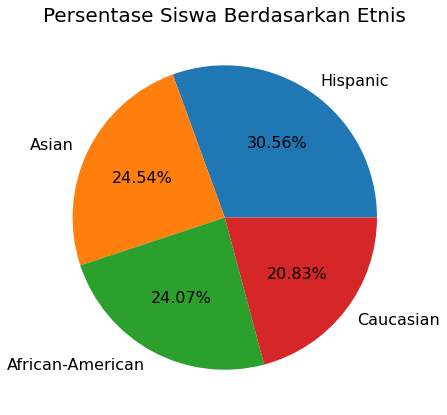

In [ ]:
plt.figure(figsize = (7,7))
plt.pie(df.loc[:,'Ethnic'].value_counts().values, 
        labels = df.loc[:,'Ethnic'].value_counts().index,
        autopct='%.2f%%',textprops={'fontsize': 16})
plt.title('Persentase Siswa Berdasarkan Etnis',fontsize=20)
plt.show()

<Figure size 720x1080 with 0 Axes>

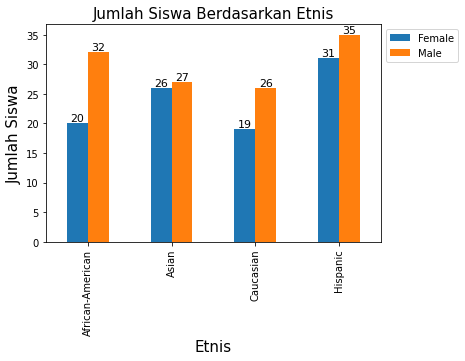

In [ ]:
ethnic_gender = pd.pivot_table(df, index = 'Ethnic', 
                               columns = 'Gender', 
                               aggfunc = 'count', 
                               values = 'Score')
plt.figure(figsize =(10,15))
ax = ethnic_gender.plot(kind = 'bar')
plt.title('Jumlah Siswa Berdasarkan Etnis',fontsize=15)
plt.xlabel('Etnis',fontsize=15)
plt.ylabel('Jumlah Siswa',fontsize=15)
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
for container in ax.containers:
  ax.bar_label(container,size=11)
plt.show()

Rata-Rata Nilai Siswa Berdasarkan Etnis



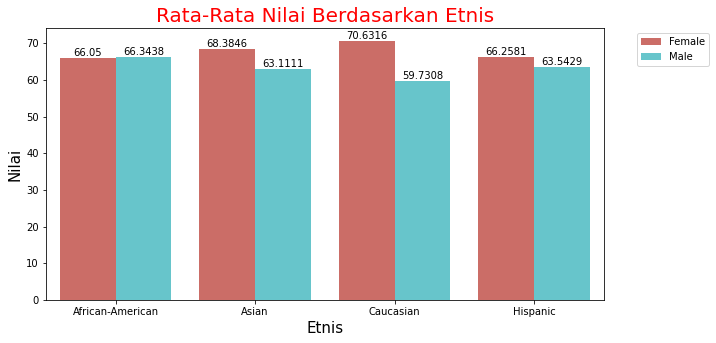

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'Ethnic', y = 'Score' , 
                 hue = 'Gender',data = df, 
                 ci = None, palette = 'hls')
plt.ylabel('Nilai',fontsize=15)
plt.xlabel('Etnis',fontsize=15)
plt.title('Rata-Rata Nilai Berdasarkan Etnis',fontsize=20,color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container)

Rata-Rata Nilai Siswa Berdasarkan Metode Belajar

[Text(0, 0, '62.3357'), Text(0, 0, '70.6842')]

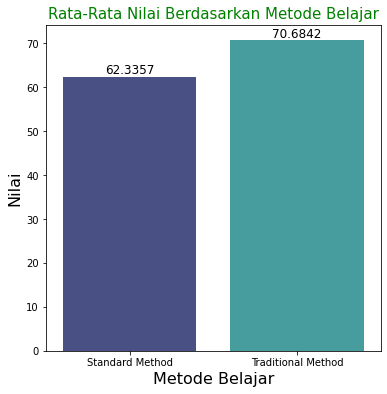

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x = 'Learning Method', 
                 y = 'Score',
                 data=df,
                 ci=None,
                 palette='mako')
plt.title('Rata-Rata Nilai Berdasarkan Metode Belajar',
          fontsize=15,
          color='green')
plt.ylabel('Nilai',fontsize=16)
plt.xlabel('Metode Belajar',fontsize=16)
ax.bar_label(ax.containers[0],size=12)


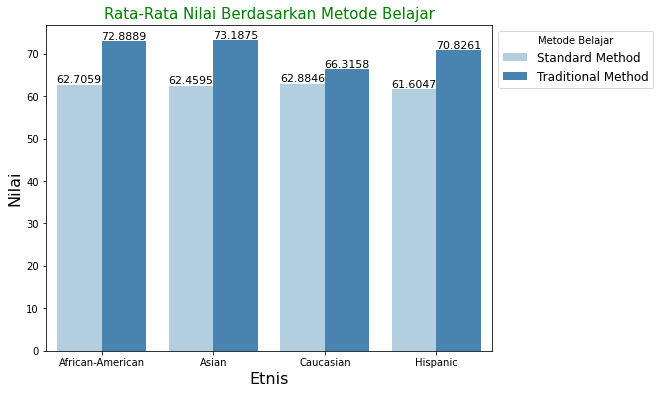

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x = 'Ethnic',
                 y = 'Score',
                 hue ='Learning Method',
                 data=df,
                 ci=None,
                 palette='Blues')
plt.title('Rata-Rata Nilai Berdasarkan Metode Belajar',
          fontsize=15,
          color='green')
plt.ylabel('Nilai',fontsize=16)
plt.xlabel('Etnis',fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), 
           loc='upper left',
           title='Metode Belajar',
           fontsize=12)
for container in ax.containers:
  ax.bar_label(container,size=11)


Rata-Rata Nilai Matematika berdasarkan Guru yang Mengajar

[Text(0, 0, '55.2676'), Text(0, 0, '69.6087'), Text(0, 0, '70.6842')]

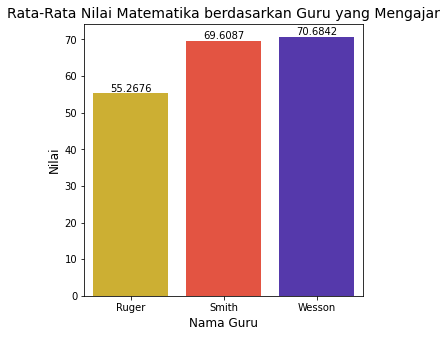

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='Teacher', y='Score', data=df, palette='CMRmap_r',ci=None)
plt.title('Rata-Rata Nilai Matematika berdasarkan Guru yang Mengajar',fontsize=14)
plt.xlabel('Nama Guru',fontsize=12)
plt.ylabel('Nilai',fontsize=12)
ax.bar_label(ax.containers[0])

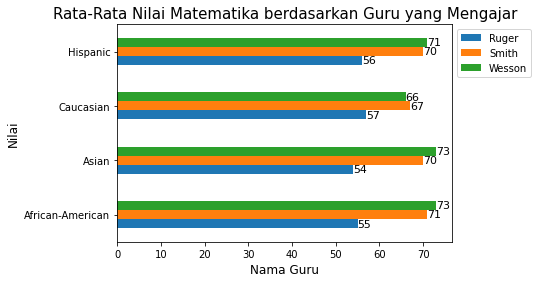

In [ ]:
teacher_score = pd.pivot_table(df, index = 'Ethnic',
                               columns = 'Teacher', 
                               aggfunc = 'mean', 
                               values = 'Score')
ax = teacher_score.round().plot(kind='barh')
plt.title('Rata-Rata Nilai Matematika berdasarkan Guru yang Mengajar',fontsize=15)
plt.xlabel('Nama Guru',fontsize=12)
plt.ylabel('Nilai',fontsize=12)
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
for container in ax.containers:
  ax.bar_label(container,size=11)
plt.show()

[Text(0, 0, '66.0288'), Text(0, 0, '64.5714')]

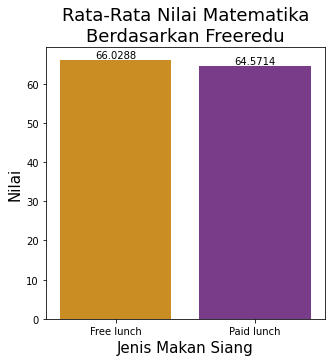

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='Freeredu', y='Score', data=df, orient='v',palette='CMRmap_r',ci=None)
plt.title('Rata-Rata Nilai Matematika\nBerdasarkan Freeredu',fontsize=18)
plt.xlabel('Jenis Makan Siang',fontsize=15)
plt.ylabel('Nilai',fontsize=15)
ax.bar_label(ax.containers[0])

<h1>Kesimpulan</h1>

Secara keseluruhan metode tradisional yang dibawa oleh Ms. Wesson menghasilkan nilai matematika yang lebih tinggi untuk para siswa dibandingkan metode belajar berbasis standar. Namun, metode pengajaran Ms. Smith cocok untuk siswa Kaukasia karena menghasilkan skor rata-rata yang sedikit lebih tinggi daripada metode Wesson. Analisis juga menunjukkan bahwa metode pengajaran Ruger menghasilkan nilai matematika yang lebih rendah dibandingkan dengan yang lain.

Jika kita melihat secara sudut pandang etnis, ras Kaukasia mendapat rata-rata nilai matematika yang tertinggi untuk kategori laki-laki, sedangkan untuk kategori perempuan nilai tertinggi didapat oleh ras Africa-America.

Terakhir, siswa yang memenuhi syarat untuk mendapat makanan gratis atau dengan harga yang lebih murah (free lunch) mendapat nilai yang sedikit lebih tinggi dibandingkan siswa yang tidak memenuhi syarat untuk mendapat makanan gratis atau dengan harga yang lebih murah (paid lunch)
